<a href="https://colab.research.google.com/github/Bzigg/machine_learning/blob/main/tone_two_classes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

# задаем некоторые параметры сети
max_features = 3000
max_length = 250
embedding_dims = 100
filters = 128
kernel_size = 4
hidden_dims = 64
epochs = 10
batch_size = 40

# загружаем данные из CSV файлов
positive_reviews = pd.read_csv('/content/sample_data/positive.csv', header=None)
negative_reviews = pd.read_csv('/content/sample_data/negative.csv', header=None)

# объединяем все данные в одном массиве и создаем лейблы
data = np.concatenate((positive_reviews[0], negative_reviews[0]), axis=0)

labels = np.concatenate((np.zeros(len(positive_reviews)), np.ones(len(negative_reviews))))

# токенизируем тексты и конвертируем в числовой формат создаем объект Tokenizer с указанием максимальной длины словаря
tokenizer = Tokenizer(num_words=max_features)
# обучаем созданный объект Tokenizer на входных данных с помощью метода fit_on_texts и создаем словарь
tokenizer.fit_on_texts(data)
# создаем последовательность (sequence) для каждого текста. каждому слову из текста соответствует номер в словаре
sequences = tokenizer.texts_to_sequences(data)
# создается новый список данных, преобразованный в формат с максимальной длиной
data = sequence.pad_sequences(sequences, maxlen=max_length)

# создаем модель сети
model = Sequential()
model.add(Embedding(max_features, embedding_dims, input_length=max_length))
model.add(Dropout(0.2))
model.add(Conv1D(filters, kernel_size, padding='valid', activation='relu', strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dense(hidden_dims))
model.add(Activation('relu'))

model.add(Dense(2, activation='sigmoid'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

# тренируем модель на данных
history = model.fit(data, labels, batch_size=batch_size, epochs=epochs, validation_split=0.1)
# тестируем модель на новых данных
new_review = "Этот продукт плохой"
new_review_seq = tokenizer.texts_to_sequences([new_review])
new_review_data = sequence.pad_sequences(new_review_seq, maxlen=max_length)
prediction = model.predict(new_review_data)
predicted_label = np.argmax(prediction)
print('Результат ' + str(predicted_label))
if predicted_label == 0:
    print('Отзыв положительный')
if predicted_label == 1:
    print('Отзыв отрицатльный')


Epoch 1/10
2556/2556 [==============================] - 285s 111ms/step - loss: 0.5970 - accuracy: 0.6684 - val_loss: 1.0274 - val_accuracy: 0.2920
Epoch 2/10
2556/2556 [==============================] - 289s 113ms/step - loss: 0.5512 - accuracy: 0.7086 - val_loss: 1.3695 - val_accuracy: 0.2601
Epoch 3/10
2556/2556 [==============================] - 284s 111ms/step - loss: 0.5163 - accuracy: 0.7345 - val_loss: 1.5045 - val_accuracy: 0.2966
Epoch 4/10
2556/2556 [==============================] - 284s 111ms/step - loss: 0.4823 - accuracy: 0.7548 - val_loss: 1.4594 - val_accuracy: 0.3527
Epoch 5/10
2556/2556 [==============================] - 284s 111ms/step - loss: 0.4523 - accuracy: 0.7726 - val_loss: 1.9606 - val_accuracy: 0.2497
Epoch 6/10
2556/2556 [==============================] - 285s 112ms/step - loss: 0.4243 - accuracy: 0.7863 - val_loss: 2.1448 - val_accuracy: 0.2690
Epoch 7/10
2556/2556 [==============================] - 285s 112ms/step - loss: 0.4019 - accuracy: 0.7969 - val_

In [36]:
import csv

positive_test_true = 0
positive_test_false = 0

with open('/content/sample_data/positive_test.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=';')
    for row in reader:
        # print(row[0])
        new_review_seq = tokenizer.texts_to_sequences([row[0]])
        new_review_data = sequence.pad_sequences(new_review_seq, maxlen=max_length)
        prediction = model.predict(new_review_data)
        predicted_label = np.argmax(prediction)
        print('Результат ' + str(predicted_label))
        if predicted_label == 0:
            positive_test_true = positive_test_true + 1
        if predicted_label == 1:
            positive_test_false = positive_test_false + 1

negative_test_true = 0
negative_test_false = 0

with open('/content/sample_data/negative_test.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=';')
    for row in reader:
        # print(row[0])
        new_review_seq = tokenizer.texts_to_sequences([row[0]])
        new_review_data = sequence.pad_sequences(new_review_seq, maxlen=max_length)
        prediction = model.predict(new_review_data)
        predicted_label = np.argmax(prediction)
        print('Результат ' + str(predicted_label))
        if predicted_label == 0:
            negative_test_false = negative_test_false + 1
        if predicted_label == 1:
            negative_test_true = negative_test_true + 1

print(positive_test_true)
print(positive_test_false)
print(negative_test_true)
print(negative_test_false)

1/1 [==============================] - 0s 23ms/step
Результат 0
1/1 [==============================] - 0s 21ms/step
Результат 0
1/1 [==============================] - 0s 23ms/step
Результат 0
1/1 [==============================] - 0s 29ms/step
Результат 0
1/1 [==============================] - 0s 24ms/step
Результат 1
1/1 [==============================] - 0s 24ms/step
Результат 1
1/1 [==============================] - 0s 32ms/step
Результат 0
1/1 [==============================] - 0s 31ms/step
Результат 1
1/1 [==============================] - 0s 31ms/step
Результат 0
1/1 [==============================] - 0s 47ms/step
Результат 0
1/1 [==============================] - 0s 42ms/step
Результат 1
1/1 [==============================] - 0s 31ms/step
Результат 0
1/1 [==============================] - 0s 36ms/step
Результат 0
1/1 [==============================] - 0s 37ms/step
Результат 0
1/1 [==============================] - 0s 34ms/step
Результат 0
1/1 [==============================] - 0

Погрешность для положительных отзывов:  0.26373626373626374
Погрешность для отрицательных отзывов:  0.20574162679425836


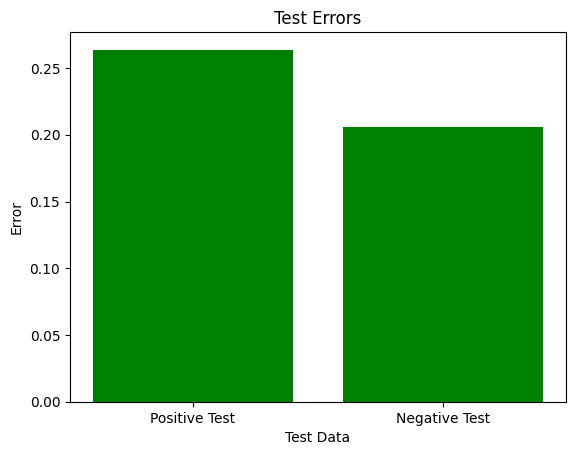

In [37]:
positive_test_error = positive_test_false / (positive_test_true + positive_test_false)
negative_test_error = negative_test_false / (negative_test_true + negative_test_false)

print("Погрешность для положительных отзывов: ", positive_test_error)
print("Погрешность для отрицательных отзывов: ", negative_test_error)

# строим графики
import matplotlib.pyplot as plt

labels = ['Positive Test', 'Negative Test']
errors = [positive_test_error, negative_test_error]

plt.bar(labels, errors, color='green')
plt.title('Test Errors')
plt.xlabel('Test Data')
plt.ylabel('Error')
plt.show()

In [38]:
new_review = 'Отличный банк для малого и среднего бизнеса, много инструментов для анализа.'
new_review_seq = tokenizer.texts_to_sequences([new_review])
new_review_data = sequence.pad_sequences(new_review_seq, maxlen=max_length)
prediction = model.predict(new_review_data)
predicted_label = np.argmax(prediction)
print('Результат ' + str(predicted_label))
if predicted_label == 0:
    print('Отзыв положительный')
if predicted_label == 1:
    print('Отзыв отрицатльный')

1/1 [==============================] - 0s 33ms/step
Результат 0
Отзыв положительный
